In [ ]:
# Step 1: Install Required Libraries
!pip install kaggle pandas matplotlib scikit-learn nltk -q

# Step 2: Upload kaggle.json (your Kaggle API key)
from google.colab import files
files.upload()

# Step 3: Move kaggle.json to the proper directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download Dataset from Kaggle
# Replace "dataset-owner/dataset-name" with the dataset you want from Kaggle
!kaggle datasets download -d snap/amazon-fine-food-reviews

# Step 5: Unzip the Dataset
!unzip amazon-fine-food-reviews.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
100% 241M/242M [00:10<00:00, 25.5MB/s]
100% 242M/242M [00:10<00:00, 24.2MB/s]
Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
# Step 6: Import Libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Step 7: Load Dataset
data = pd.read_csv("Reviews.csv")
data = data[['Text', 'Score']]  # Select relevant columns
print(data.head())
print(data.shape)
print(data.tail())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                Text  Score
0  I have bought several of the Vitality canned d...      5
1  Product arrived labeled as Jumbo Salted Peanut...      1
2  This is a confection that has been around a fe...      4
3  If you are looking for the secret ingredient i...      2
4  Great taffy at a great price.  There was a wid...      5
(568454, 2)
                                                     Text  Score
568449  Great for sesame chicken..this is a good if no...      5
568450  I'm disappointed with the flavor. The chocolat...      2
568451  These stars are small, so you can give 10-15 o...      5
568452  These are the BEST treats for training and rew...      5
568453  I am very satisfied ,product is as advertised,...      5


In [ ]:
# Simplify Scores: Positive (4, 5), Negative (1, 2), Neutral (3)
def categorize_score(score):
    if score > 3:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

data['Sentiment'] = data['Score'].apply(categorize_score)
data = data[['Text', 'Sentiment']].dropna()

# Step 8: Preprocess Text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

In [ ]:
# Step 9: Split Data into Training and Testing
X = data['Cleaned_Text']
y = data['Sentiment']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 10: Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Step 11: Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Test the model on custom reviews
def predict_sentiment(review):
    processed = preprocess_text(review)
    vectorized = vectorizer.transform([processed])
    return model.predict(vectorized)[0]

print("\nCustom Review Sentiment:")
print(predict_sentiment("The product is amazing and works perfectly!"))
print(predict_sentiment("This is the worst purchase I have ever made."))

Accuracy: 0.8335048508677028

Classification Report:
               precision    recall  f1-score   support

    Negative       0.65      0.65      0.65     16181
     Neutral       0.34      0.33      0.34      8485
    Positive       0.91      0.91      0.91     89025

    accuracy                           0.83    113691
   macro avg       0.63      0.63      0.63    113691
weighted avg       0.83      0.83      0.83    113691


Custom Review Sentiment:
Positive
Negative


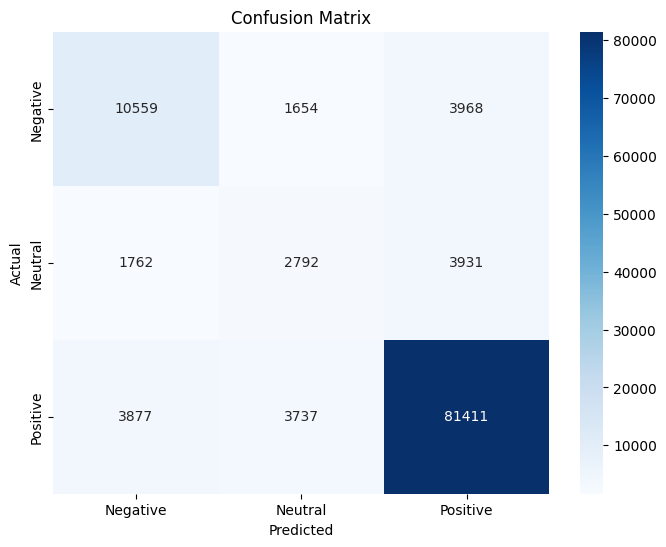

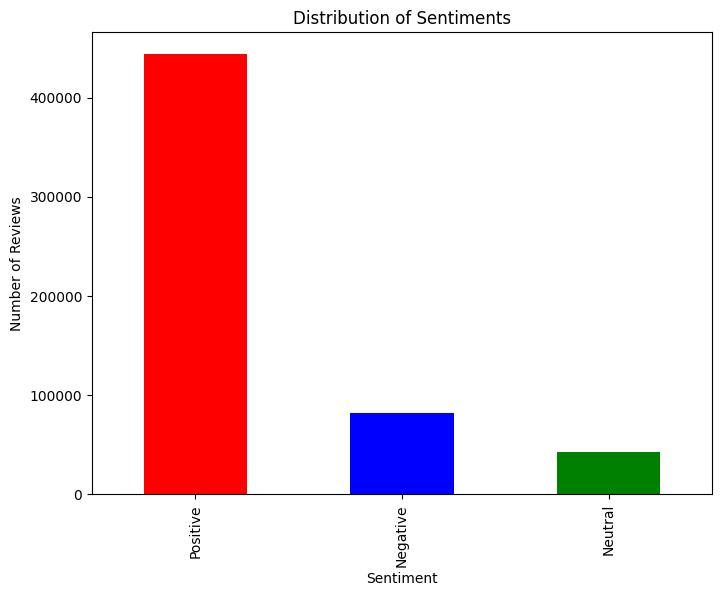

In [ ]:
# prompt: plot graphs

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 12: Visualize Results (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize the distribution of sentiments in the dataset
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()